In [2]:
import cobra
import pandas as pd

# Exercise Block 2. Analyzing simple biological networks

Metabolic networks – We will use the following two metabolic networks in this section: 
 
1. glycolysis.xml - This metabolic network consists of reactions involved in the glycolysis 
pathway. The default objective function is the maximization of ATP production 
(abbreviated as atp in the metabolic model). Figure 2 below serves as a visual 
representation of the network. 
 
2. e_coli_core.xml - This metabolism contains what is called the core E. coli metabolic 
network, as proposed by the laboratory of Bernhard Palsson. The files 
Ecoli_core_figure.pdf and Ecoli_core_figure.jpg are added to this folder as a visual 
representation of the core E. coli model.

# 2 Exercise 2.1. Load the glycolysis model into python.
How many metabolites and reactions does it include?

Note that this model uses short-hand reaction identifiers (IDs) that are not the same as the 
reactions’ names in figure 2. 
 
How many metabolites and reactions does the model have?  Write a script that lists all 
reactions and their associated information. It should look something like this: 
 
name : id : reaction : lb : ub 

GLCtr : R1 : glc_D_e + h_e <=> glc_D + h : -1000.0 : 1000.0 

GLCPTS : R2 : glc_D_e + pep --> g6p + pyr : 0.0 : 1000.0 

HEX : R3 : atp + glc_D <=> adp + g6p : -1000.0 : 1000.0 

In [4]:
model = cobra.io.read_sbml_model("glycolysis.xml")

In [5]:
for reaction in list(model.reactions):
    print(f"{reaction.name = } {reaction.id = } {reaction.reaction =} {reaction.bounds = }")

reaction.name = 'GLCtr' reaction.id = 'R1' reaction.reaction ='glc_D_e + h_e <=> glc_D + h' reaction.bounds = (-1000.0, 1000.0)
reaction.name = 'GLCPTS' reaction.id = 'R2' reaction.reaction ='glc_D_e + pep --> g6p + pyr' reaction.bounds = (0.0, 1000.0)
reaction.name = 'HEX' reaction.id = 'R3' reaction.reaction ='atp + glc_D <=> adp + g6p' reaction.bounds = (-1000.0, 1000.0)
reaction.name = 'PYRtr' reaction.id = 'R4' reaction.reaction ='h_e + pyr_e <=> h + pyr' reaction.bounds = (-1000.0, 1000.0)
reaction.name = 'LACtr' reaction.id = 'R5' reaction.reaction ='h + lac_D <=> h_e + lac_D_e' reaction.bounds = (-1000.0, 1000.0)
reaction.name = 'Htr' reaction.id = 'R6' reaction.reaction ='h_e <=> h' reaction.bounds = (-1000.0, 1000.0)
reaction.name = 'O2tr' reaction.id = 'R7' reaction.reaction ='o2_e <=> o2' reaction.bounds = (-1000.0, 1000.0)
reaction.name = 'H2Otr' reaction.id = 'R8' reaction.reaction ='h2o_e <=> h2o' reaction.bounds = (-1000.0, 1000.0)
reaction.name = 'PGI' reaction.id = 'R

Provide a list of the metabolites as well. A model’s reactions can be found in 
model.reactions, its metabolites in model.metabolites. In the COBRApy reference, 
have a look at the properties of the reaction and metabolite objects, respectively. 

In [6]:
meta = list(model.metabolites)
for idx, mta in enumerate(meta):
    print(idx, mta)

0 h_e
1 glc_D
2 h
3 glc_D_e
4 pyr
5 pep
6 g6p
7 adp
8 atp
9 pyr_e
10 lac_D
11 lac_D_e
12 o2_e
13 o2
14 h2o_e
15 h2o
16 f6p
17 fdp
18 pi
19 g3p
20 dhap
21 nad
22 13dpg
23 nadh
24 3pg
25 2pg


Once you have gathered the information about the reactions, perform FBA to maximize 
ATP production. You do not have to change the model.objective, but take a look at it 
and try to explain why having this reaction as the objective maximizes ATP production. 
Provide a list of all active reactions. How many are there?

In [8]:
model = cobra.io.read_sbml_model("glycolysis.xml")

fba_solution = model.optimize()
print(model.objective)
print(model.reactions.get_by_id("R20"))

print("\nSummary:")
print(model.summary())

print("Active reactions")
print(fba_solution.fluxes[fba_solution.fluxes.round(3) > 0])

Maximize
1.0*R20 - 1.0*R20_reverse_0060f
R20: atp --> adp + pi

Summary:
Objective
1.0 R20 = 20.0

Uptake
------
Metabolite Reaction Flux  C-Number C-Flux
   glc_D_e      R21   10         0  0.00%

Secretion
---------
Metabolite Reaction Flux  C-Number C-Flux
       h_e      R22  -20         0  0.00%
   lac_D_e      R24  -20         0  0.00%
     h2o_e      R26  -20         0  0.00%

Active reactions
R2     10.0
R5     20.0
R9     10.0
R10    10.0
R12    10.0
R13    10.0
R14    20.0
R15    20.0
R16    20.0
R17    20.0
R18    10.0
R19    20.0
R20    20.0
R22    20.0
R24    20.0
R26    20.0
Name: fluxes, dtype: float64


## Exercise 2.2. (OPTIONAL) GLCPTS (glucose phosphotransferase system) is a 
reaction that imports glucose into the cell. Use figure 2 to answer if GLCPTS is an 
essential or a nonessential reaction? Why or why not? Then use COBRApy to check 
your answer.

In [13]:
from cobra.flux_analysis import single_reaction_deletion 
del_results = single_reaction_deletion(model)
del_results.round(3)

ids  growth   status
0    {R1}    20.0  optimal
1   {R10}     0.0  optimal
2    {R5}     0.0  optimal
3    {R8}     0.0  optimal
4   {R15}    -0.0  optimal
5   {R24}     0.0  optimal
6    {R4}    20.0  optimal
7   {R25}    20.0  optimal
8    {R3}    20.0  optimal
9   {R21}     0.0  optimal
10  {R13}     0.0  optimal
11  {R18}    20.0  optimal
12  {R11}    20.0  optimal
13  {R12}     0.0  optimal
14  {R14}     0.0  optimal
15  {R23}    20.0  optimal
16   {R2}    20.0  optimal
17  {R19}     0.0  optimal
18  {R22}     0.0  optimal
19  {R20}     0.0  optimal
20  {R17}     0.0  optimal
21   {R9}     0.0  optimal
22  {R16}     0.0  optimal
23   {R6}    20.0  optimal
24  {R26}     0.0  optimal
25   {R7}    20.0  optimal

# Exercise 2.3. Use figure 2 shown above and the model glycolysis.xml to identify the 
role of the reaction catalyzed by lactate dehydrogenase (LDH in the model), beyond 
its enzymatic function.

Hint: Is LDH an essential reaction? Why or why not? 

In [49]:
from cobra.flux_analysis import single_reaction_deletion 
# effect of deleting a single reaction on the maximum possible growth rate after deletion
deletion_results = single_reaction_deletion(model)

In [61]:
deletion_results["growth"] = deletion_results["growth"].round(3)
deletion_results[deletion_results["ids"] == {"R19"}]

ids  growth   status
17  {R19}     0.0  optimal

Which cofactors are involved in the 
LDH reaction? How many other reactions use these cofactors? After performing FBA, 
look at model.metabolites.nadh.summary(), which may help you answer the 
question. 

In [22]:
model.reactions.get_by_id("R19")

<Reaction R19 at 0x137c3eca0>

In [23]:
model.metabolites.nadh.summary()

# Exercise 2.4. (OPTIONAL) Flux Variability Analysis at different fractions of the maximum rate of biomass production. 

The following command will perform FVA for all reactions in a model when the biomass 
growth flux is constrained to its maximum value:

In [62]:
fva_result = cobra.flux_analysis.flux_variability_analysis(model, fraction_of_optimum=1)

In [65]:
fva_result.round(3).head()

minimum  maximum
R1    -10.0     10.0
R2      0.0     20.0
R3    -10.0     10.0
R4      0.0      0.0
R5     20.0     20.0

The argument fraction_of_optimum has the default value of 1, which means that FVA 
is performed subject to the constraint that the objective function (e.g., maximal biomass 
growth) attains the maximal (optimal) value. This constraint set to the objective function 
can be loosened by setting fraction_of_optimum to any number in the range of 0 to 1. 
 
Consider the network’s flux variability when constraining biomass growth to different 
fractions of the optimum. A simple measure of a network’s flux variability is the sum of 
the flux variabilities of all reactions in the network. A reaction’s flux variability is the 
range of possible values the flux through said reaction can take. 
(Note that this measure is highly dependent on the number of reactions in a network, the 
network itself, and the reaction bounds, and can therefore only be used to compare FVA 
results at different fractions of optimum.) 
 
Does the network’s flux variability change when relaxing the constraint of optimal 
growth? Why or why not?

In [73]:
fva_result = cobra.flux_analysis.flux_variability_analysis(model, fraction_of_optimum=1)
fva_result = fva_result.round(3)
fva_result["diff"] = abs(fva_result["minimum"] - fva_result["maximum"])
fva_result.head()
fva_result["diff"].sum()

100.0

In [74]:
fva_result = cobra.flux_analysis.flux_variability_analysis(model, fraction_of_optimum=0.5)
fva_result = fva_result.round(3)
fva_result["diff"] = abs(fva_result["minimum"] - fva_result["maximum"])
fva_result.head()
fva_result["diff"].sum()

270.0

In [75]:
fva_result = cobra.flux_analysis.flux_variability_analysis(model, fraction_of_optimum=0.1)
fva_result = fva_result.round(3)
fva_result["diff"] = abs(fva_result["minimum"] - fva_result["maximum"])
fva_result.head()
fva_result["diff"].sum()

406.0

Yes, more options.

# Exercise 2.5. In this and in the following exercises, we will work with the core metabolism of E. coli.

Before performing any calculations, it is always good to take a 
look at the model. Open the model and list 
- the number of metabolites, 
- genes 
- reactions.

In [76]:
model = cobra.io.read_sbml_model("e_coli_core.xml")

In [84]:
print(f"Metabolites: {len(model.metabolites)}") 
print(f"Genes: {len(model.genes)}") 
print(f"Reactions: {len(model.reactions)}")

Metabolites: 72
Genes: 137
Reactions: 95


How many external reactions does this model include? 

Which metabolites can be imported into the cell? 

To find the external reactions in the list model.reactions, it may be useful to know that 
in this model the reaction IDs of all external reactions start with 'EX_'. For example, the 
identifier for the external reaction of oxygen is EX_o2_e. Alternatively, external (or 
exchange) reactions are also stored in the list model.exchanges. Try both to see if your 
results are the same. Also, keep in mind that if a metabolite is taken up by the cell, its 
associated external reaction will show a negative flux. 

In [97]:
len(model.exchanges)

20

In [143]:
# Negative lower bounds in an exchange reaction means that it allows metabolites
# to enter the system
[x._metabolites for x in model.exchanges if round(x._lower_bound, 3) < 0]


[{<Metabolite co2_e at 0x137f5f820>: -1.0},
 {<Metabolite glc__D_e at 0x138073a00>: -1.0},
 {<Metabolite h_e at 0x1380737f0>: -1.0},
 {<Metabolite h2o_e at 0x1380738e0>: -1.0},
 {<Metabolite nh4_e at 0x137ebc7f0>: -1.0},
 {<Metabolite o2_e at 0x137a524f0>: -1.0},
 {<Metabolite pi_e at 0x137a525e0>: -1.0}]

The exchange reactions are defined by the model. They are not the empirically observed transport reactions.

# Exercise 2.6. Compute the biomass production of the network for different uptake rates of glucose.

Plot biomass against glucose uptake rates. Explain the relationship between the two quantities that you observe.

An important concept for this section is that of a (growth-)limiting nutrient. A nutrient is 
limiting if a reduction in its uptake rate leads to a reduction in growth. 


Start by computing FBA with the default value (10 mmol/gDW/hr of glucose). 
Look at the results, then compute the rates with different glucose uptake values ranging 
from 0 to 50. To perform this task, you will need to change the flux boundaries. 
Remember this can be done with: 

model.reactions.get_by_id('REACTION ID').lower_bound = ANY VALUE 

Look at the details of the model’s exchanges to find the correct reaction ID. Make a plot 
to visualize your results. Describe what you see. Is glucose growth-limiting over the 
entire concentration range? If not, which other nutrient(s) might be growth-limiting? 

In [152]:
model.metabolites.glc__D_e.summary()

/Library/Python/3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


<AxesSubplot:xlabel='Glucose flux (mmol/gDW/hr)', ylabel='mmol/gDW/hr'>

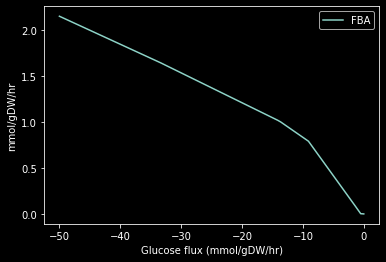

In [170]:
import numpy as np
model = cobra.io.read_sbml_model("e_coli_core.xml")

obj_val = []
fluxes = []
for flux in np.linspace(0, -50, 100):
    fluxes.append(flux)
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = flux
    fba_solution = model.optimize()
    obj_val.append(fba_solution.objective_value)

df = pd.DataFrame({"Flux Glc":fluxes, "FBA": obj_val})
df.plot(x="Flux Glc", y="FBA", xlabel="Glucose flux (mmol/gDW/hr)", ylabel="mmol/gDW/hr")

In [17]:
model = cobra.io.read_sbml_model("e_coli_core.xml")
model.reactions.get_by_id('EX_glc__D_e').lower_bound = -0.5
cobra.io.write_sbml_model(model, "ecoli_05.xml")

# Exercise 2.7. Let's take a closer look to understand what happens when the glucose uptake changes. 

Write a script that will perform FBA for different glucose uptake 
values between 0 and 50 mmol/gDW/hr. Store the flux value of the external 
reactions with the IDs EX_o2_e, EX_co2_e, EX_ac_e and EX_etoh_e. Plot these 
fluxes against the glucose uptake rate and try to explain the pattern you observe. 

/Library/Python/3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


EX_o2_e  EX_co2_e  EX_ac_e  EX_etoh_e  EX_glc__D_e  Bio mass
0  0.000000  0.000000      0.0        0.0      0.00000       0.0
1 -0.300300  0.300300      0.0        0.0      0.05005       0.0
2 -0.600601  0.600601      0.0        0.0      0.10010       0.0
3 -0.900901  0.900901      0.0        0.0      0.15015       0.0
4 -1.201201  1.201201      0.0        0.0      0.20020       0.0
5 -1.501502  1.501502      0.0        0.0      0.25025       0.0
6 -1.801802  1.801802      0.0        0.0      0.30030       0.0
7 -2.102102  2.102102      0.0        0.0      0.35035       0.0
8 -2.402402  2.402402      0.0        0.0      0.40040       0.0
9 -2.702703  2.702703      0.0        0.0      0.45045       0.0

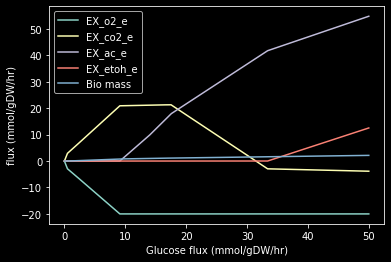

In [16]:
import numpy as np

model = cobra.io.read_sbml_model("e_coli_core.xml")

bio_mass = []
ex_ids = ["EX_o2_e", "EX_co2_e", "EX_ac_e", "EX_etoh_e"]
ex_fluxes = {name:[] for name in ex_ids}
glc_fluxes = []
for flux in np.linspace(0, -50, 100):
    glc_fluxes.append(flux)
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = flux
    bio_mass.append(model.optimize().objective_value)
    for ex_id in ex_ids:
        ex_fluxes[ex_id].append(model.reactions.get_by_id(ex_id).flux)

glc_fluxes = [abs(x) for x in glc_fluxes]
df = pd.DataFrame(ex_fluxes)
df["EX_glc__D_e"] = glc_fluxes
df["Bio mass"] = bio_mass
df.plot(x="EX_glc__D_e", xlabel="Glucose flux (mmol/gDW/hr)", ylabel="flux (mmol/gDW/hr)")
df.head(10)

In [12]:
model = cobra.io.read_sbml_model("e_coli_core.xml")
model.reactions.get_by_id('EX_glc__D_e').lower_bound = -1
sol = model.optimize()
model.summary()

Each time we see a change in the slops, it means that there is a new metabolic strategy being used. glc flux from 0 to 10: aerobic respiration. From 10 onwards: different types of anaerobic respiration. At around 20, CO_2 is being consumed by a new process.

# Exercise 2.8. Compute the biomass growth rate for acetate as the sole carbon source 
with an acetate uptake flux of 10 mmol/gDW/hr. Is it different from the biomass 
growth rate on glucose with the same uptake rate? Why or why not? 


In [25]:
model = cobra.io.read_sbml_model("e_coli_core.xml")

# Remove glc source
model.reactions.get_by_id('EX_glc__D_e').lower_bound = 0
# Add acetate source
model.reactions.get_by_id('EX_ac_e').lower_bound = -10

model.optimize().objective_value

0.1733385844777864

In [26]:
model = cobra.io.read_sbml_model("e_coli_core.xml")

model.reactions.get_by_id('EX_glc__D_e').lower_bound = -10

model.optimize().objective_value

0.8326136426821362

# Exercise 2.9. Are there any other metabolites that could be used as carbon sources for the core metabolism of E. coli? 

For a metabolite to be a potential carbon source, it must be able to be imported into the 
cell and must possess at least one carbon atom. The first condition is met by all 
metabolites with an associated external reaction. Checking if a given metabolite 
possesses at least one carbon atom can be a little more troublesome. Luckily, each 
metabolite in this model has a property metabolite.elements, which stores the 
number of atoms of each element in the metabolite in a dictionary, and a property 
metabolite.formula, which stores its chemical formula as a string. To find the 
metabolites involved in a reaction, you can use the reaction property 
reaction.metabolites.

Since this model is small enough, you may print the elements or the formula of all 
external metabolites to find the ones that fulfill the conditions for being a carbon source 
by hand. If you feel confident, write a python script to do this automatically. 

In [54]:
model = cobra.io.read_sbml_model("e_coli_core.xml")

c_sources = []
for x in model.metabolites:
    if x.elements.get("C") is not None and x.elements.get("C") > 0:
        c_sources.append(x)

[x.name for x in c_sources]

['3-Phospho-D-glyceroyl phosphate',
 'D-Glycerate 2-phosphate',
 '3-Phospho-D-glycerate',
 '6-Phospho-D-gluconate',
 '6-phospho-D-glucono-1,5-lactone',
 'Acetate',
 'Acetate',
 'Acetaldehyde',
 'Acetaldehyde',
 'Acetyl-CoA',
 'Cis-Aconitate',
 'Acetyl phosphate',
 'ADP',
 '2-Oxoglutarate',
 '2-Oxoglutarate',
 'AMP',
 'ATP',
 'Citrate',
 'CO2',
 'CO2',
 'Coenzyme A',
 'Dihydroxyacetone phosphate',
 'D-Erythrose 4-phosphate',
 'Ethanol',
 'Ethanol',
 'D-Fructose 6-phosphate',
 'D-Fructose 1,6-bisphosphate',
 'Formate',
 'Formate',
 'D-Fructose',
 'Fumarate',
 'Fumarate',
 'Glyceraldehyde 3-phosphate',
 'D-Glucose 6-phosphate',
 'D-Glucose',
 'L-Glutamine',
 'L-Glutamine',
 'L-Glutamate',
 'L-Glutamate',
 'Glyoxylate',
 'Isocitrate',
 'D-Lactate',
 'D-Lactate',
 'L-Malate',
 'L-Malate',
 'Nicotinamide adenine dinucleotide',
 'Nicotinamide adenine dinucleotide - reduced',
 'Nicotinamide adenine dinucleotide phosphate',
 'Nicotinamide adenine dinucleotide phosphate - reduced',
 'Oxaloacetat